# Project: Wrangling and Analyze Data

## Importing Modules
Setting up the notebook for the project at hand. Libraries to import include the following:
1. pandas
2. NumPy
3. requests
4. tweepy
5. json
6. matplotlib

In [11]:
import pandas as pd
import numpy as np
import requests  # import statement for library used to download files programmatically
import tweepy  # import statement for library used to query twitter api
from tweepy import OAuthHandler
import re    # import statement for regular expressions (regex)
import time
import json
import os
import io
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [12]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Dataframe Counter/Tracker 

- twitter_archive - df one

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [13]:
# creating a new folder for the files I'm about to download programmatically
# I would save the files into a folder on my computer
destination_folder_name = 'image_predictions' 

if not os.path.exists(destination_folder_name):  # I want to see if the folder already exists
    os.makedirs(destination_folder_name) # otherwise, I'll use python to create it

Now that we have created the folder 'image_predictions', let us proceed to download what will be put in it:

In [14]:
# inputting the url from which the tsv file would be downloaded
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# downloading the file
response = requests.get(url) 

# checking to see if tsv file was correctly downloaded
response 

<Response [200]>

In [15]:
# splitting the url by the forward slash so I can get the last item in the list
# that is, the 'image-predictions.tsv' part of the string 
# that part is the tsv file I need
with open(os.path.join(destination_folder_name,
                       url.split('/')[-1]),mode = 'wb') as file: 
    
# writing the tsv file I just downloaded to the image_predictions folder
# notice indentation is maintained because code is part of the 'with open' block
    file.write(response.content)

In [16]:
# checking to see if writing the tsv file to the folder worked
os.listdir(destination_folder_name) # this should tell us the files in the destination_folder_name directory

['image-predictions.tsv']

In [17]:
# reading the tsv file

'''The tsv file is not in the same directory as ipynb file since we created a folder for it during download
   
   So we need to tell jupyter where to find it by typing the file path in single quotes 
   
   To read the file, I added r before the quote
   
   The tsv file_name won't appear on the file_path by default 
   
   Therefore, I inserted a backslash and typed the file_name as the last item on the file_path 
   
   Once done this way, there is no need to specify the file_name in the pd.read_csv() command again 
   
   Just copy and paste 'file_path' and add the separator where applicable'''

# actual implementation
file_path = r'C:\Users\Admin\Downloads\Stat Zone\jupyternotebookfiles\udacity-alx\quiz solutions\data-wrangling\p2-weratedogs\image_predictions\image-predictions.tsv'


# now reading the tsv file into a pandas df using file_path
img_predictions = pd.read_csv(file_path, sep = '\t')
img_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Dataframe Counter/Tracker 

- twitter_archive - df one
- img_predictions - df two

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

Source: www.youtube.com/watch?v=QMOwEOOMweg - UB Women Data Scholars

In [18]:
''' 

# querying twitter api for the weratedogs account
# you could also use a configparser to conceal api keys
# this part was commented out after fetching the tweets

consumer_key = '' #'YOUR CONSUMER KEY'
consumer_secret = '' # 'YOUR CONSUMER SECRET'
access_token = '' #'YOUR ACCESS TOKEN'
access_secret = ''  #'YOUR ACCESS SECRET'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

'''

" \n\n# querying twitter api for the weratedogs account\n# you could also use a configparser to conceal api keys\n# this part was commented out after fetching the tweets\n\nconsumer_key = '' #'YOUR CONSUMER KEY'\nconsumer_secret = '' # 'YOUR CONSUMER SECRET'\naccess_token = '' #'YOUR ACCESS TOKEN'\naccess_secret = ''  #'YOUR ACCESS SECRET'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n"

In [19]:
# verifying that the account that made this request is actually mine
who_called = api.verify_credentials()
who_called.screen_name # this should print my twitter username which is FesomadeAlli

NameError: name 'api' is not defined

In [20]:
tweet_file =[] # this is where I would parse contents from the tweet data whose api I queried using tweepy

In [21]:
'''
# tweet IDs for which to gather additional data via Twitter's API
# these IDs are from the tweet_id columns of the twitter_archive df
tweet_ids = list(twitter_archive.tweet_id.values)


start_time = time.time() # to evaluate the time taken to execute this block of code

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
        
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for each_id in tweet_ids:
            try:
                tweet = api.get_status(each_id, tweet_mode='extended')
                tweet_content = {'tweet_id':tweet.id, 'retweet_count':tweet.retweet_count,
                                                        'favorite_count':tweet.favorite_count}
                tweet_file.append(tweet_content)
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except Exception as e:
                print("Fail",e)
                pass
end_time = time.time()
print(end_time - start_time)
'''

'\n# tweet IDs for which to gather additional data via Twitter\'s API\n# these IDs are from the tweet_id columns of the twitter_archive df\ntweet_ids = list(twitter_archive.tweet_id.values)\n\n\nstart_time = time.time() # to evaluate the time taken to execute this block of code\n\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n        \n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n        for each_id in tweet_ids:\n            try:\n                tweet = api.get_status(each_id, tweet_mode=\'extended\')\n                tweet_content = {\'tweet_id\':tweet.id, \'retweet_count\':tweet.retweet_count,\n                                                        \'favorite_count\':tweet.favorite_count}\n                tweet_file.append(tweet_content)\n                json.dump(tweet._json, outfile)\n                outfile.write(\'\n\')\n            except Exception as e:\n          

In [22]:
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet_file.append(json.loads(line))
        except:
            continue
            
tweet_file[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [23]:
# create a list of data from tweet_json.txt
list_of_api_tweets = []
for json_data in tweet_file:
    list_of_api_tweets.append({'id' : json_data['id'],
                       'retweet_count': int(json_data['retweet_count']),
                       'favorite_count' : int(json_data['favorite_count'])})

# creating a Dataframe
tweets_api = pd.DataFrame(list_of_api_tweets, columns = ['id', 'retweet_count' , 'favorite_count']) 

# checking out the obtained DataFrame
tweets_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,6970,33701
1,892177421306343426,5274,29230
2,891815181378084864,3464,21974
3,891689557279858688,7191,36794
4,891327558926688256,7718,35186


## Tip
After consulting my colleagues on the nanodegree program \
and also checking online, I found this really cool idea \
However, i was already at the cleaning stage when I saw this \
Couldn't go back for another 20 minutes and do something that will affect everything I'd done before \
but wanted to document it all the same - dunno if it works though but logically assessing it, it should.


#### The Premise - Failed tweets from Tweepy query
It is no suprise that some tweets returned 404 errors \
The base assumption is that 'the tweets have been deleted' \
However, there was a proposition by my colleagues that they may have failed due network \
So this block of code should help confirm that.


 #### Starting point
Remember we wrote this **except Exception as e:** during our try amd except block \
We could return to that block of code and insert **failed_tweets.append(each_id)** \
before/after the **print("Fail",e)** statement 

Once done, we can just print a list of the failed_tweets to extract their tweet_id so we can retry the query


#### Retrying the query for each of the tweet_id in failed_tweets list
 
We use try and except again and append the tweet_id from the failed retries into another list called failed_retries \

**The code block looks something of this sort:** 

failed_retries = []  # this is a list to hold failed retries from our new query

for retries in failed_tweets:

    try:
        page = api.get_status(retries, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        
        retries_list.append({'tweet_id': retries['id'], 
                        'favorites': int(retries['favorites']),
                        'retweet_count': int(retries['retweet_count'])
                        })
        
    except Exception:
        failed_retries.append(e)
        
Creating a Dataframe from the retries looks like this:
api_tweet_retries_df = pd.DataFrame(retries_list, columns = ['id', 'retweet_count' , 'favorite_count'])



#### Final step
View the list of retry exceptions (failed_retries) again to see if retries are actually available. 
If those tweets are available, just join the dataframe to the initial one, else, the assumption that these tweets are no longer available to get with the API is most likely a correct one!

If retry was successful, view *api_tweet_retries_df* and proceed to join the dataframes.

#### Note
I won't probably add the int() type-casting lines of code if it wasn't originally part of my block of code because I do not want to have two datatypes in that column. I'd maintain uniformity while querying and convert the entire column later or cast the type from the on-set on both fronts.


Dataframe Counter/Tracker 

- twitter_archive - df one
- img_predictions - df two
- tweets_api - df three

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



**Copying All Dataframes**

In [24]:
twitter_archive_copy = twitter_archive.copy()
img_predictions_copy = img_predictions.copy()
tweets_api_copy = tweets_api.copy()

Dataframe Counter/Tracker 

- twitter_archive - df one
- img_predictions - df two
- tweets_api - df three

- twitter_archive_copy - df four
- img_predictions_copy - df five
- tweets_api_copy - df six

## Note
Let's inspect the original and clean the copies

#### Visual Assessment
#### Programmatic Assessment

In [25]:
# twitter_archive
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [26]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [27]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [28]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1449,696100768806522880,NaN,NaN,2016-02-06 22:38:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This poor pupper has been stuck in a vortex si...,NaN,NaN,NaN,https://vine.co/v/i1KWj0vbvA9,10,10,None,None,None,pupper,None
1209,715696743237730304,NaN,NaN,2016-04-01 00:26:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's a Lithuanian High-Steppin Stic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715696743...,10,10,Toby,None,None,None,None
16,888917238123831296,NaN,NaN,2017-07-23 00:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,None,None,None,None
1739,679511351870550016,NaN,NaN,2015-12-23 03:58:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to William. He makes fun of others b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679511351...,7,10,William,None,None,None,None
1740,679503373272485890,NaN,NaN,2015-12-23 03:26:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dwight. He's a pointy pupper. Very doc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679503373...,8,10,Dwight,None,None,pupper,None
1372,702217446468493312,NaN,NaN,2016-02-23 19:44:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know it's tempting, but please stop sending ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/702217446...,9,10,None,None,None,None,None
81,877201837425926144,NaN,NaN,2017-06-20 16:29:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nelly. He graduated with his dogtorate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877201837...,12,10,Nelly,None,None,None,None
1705,680836378243002368,NaN,NaN,2015-12-26 19:43:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie. She's secretly ferocious. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680836378...,12,10,Ellie,None,None,pupper,None
1798,677228873407442944,NaN,NaN,2015-12-16 20:48:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chuq. He just wants to fit in. 11...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677228873...,11,10,Chuq,None,None,None,None
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None


In [29]:
twitter_archive.info()
twitter_archive.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

(2356, 17)

In [30]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [31]:
sum(twitter_archive.duplicated())

0

In [32]:
# img_predictions
img_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [33]:
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
img_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [35]:
img_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
845,695095422348574720,https://pbs.twimg.com/media/CaV5mRDXEAAR8iG.jpg,1,papillon,0.227784,True,Chihuahua,0.218128,True,Border_collie,0.093457,True
1912,853760880890318849,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,miniature_pinscher,0.292519,True,Chihuahua,0.120946,True,Rottweiler,0.119490,True
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1523,788150585577050112,https://pbs.twimg.com/media/CvASw6dWcAQmo3X.jpg,3,chow,0.814145,True,Pomeranian,0.112704,True,Chihuahua,0.015883,True
1057,714631576617938945,https://pbs.twimg.com/media/CerhoBWWAAA5eLL.jpg,1,meerkat,0.143497,False,weasel,0.117402,False,black-footed_ferret,0.099933,False
1652,809808892968534016,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True
1924,857263160327368704,https://pbs.twimg.com/media/C-WcS4MXoAADrBU.jpg,1,Samoyed,0.998021,True,Pomeranian,0.000922,True,keeshond,0.000311,True
1830,836260088725786625,https://pbs.twimg.com/media/C5r-G2IUwAA6KBY.jpg,1,borzoi,0.564688,True,ice_bear,0.078267,False,Pembroke,0.057916,True
1774,828046555563323392,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,3,patio,0.272972,False,window_screen,0.131295,False,boathouse,0.046393,False
729,686606069955735556,https://pbs.twimg.com/media/CYdQktMWsAEI29_.jpg,1,Labrador_retriever,0.320012,True,Ibizan_hound,0.208172,True,Saluki,0.078975,True


In [36]:
img_predictions.info()
img_predictions.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


(2075, 12)

In [37]:
img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [38]:
sum(img_predictions.duplicated())

0

In [39]:
# tweets_api
tweets_api

,id,retweet_count,favorite_count
0,892420643555336193,6970,33701
1,892177421306343426,5274,29230
2,891815181378084864,3464,21974
3,891689557279858688,7191,36794
4,891327558926688256,7718,35186
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [40]:
tweets_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,6970,33701
1,892177421306343426,5274,29230
2,891815181378084864,3464,21974
3,891689557279858688,7191,36794
4,891327558926688256,7718,35186


In [41]:
tweets_api.tail()

,id,retweet_count,favorite_count
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112
2326,666020888022790149,419,2283


In [42]:
tweets_api.sample(10)

,id,retweet_count,favorite_count
1741,678341075375947776,472,1572
276,838150277551247360,301,1567
1183,715360349751484417,1408,5029
1724,678800283649069056,817,2348
435,818588835076603904,5669,0
1775,676946864479084545,326,1574
1164,717790033953034240,985,2632
1949,672984142909456390,470,1116
659,789137962068021249,2598,9203
1124,725786712245440512,1240,3842


In [43]:
tweets_api.info()
tweets_api.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


(2327, 3)

In [44]:
tweets_api.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2459.143103,7028.016330
std,6.820795e+16,4164.692973,10921.561623
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1221.000000
50%,7.178418e+17,1144.000000,3038.000000
75%,7.986547e+17,2844.500000,8566.000000
max,8.924206e+17,70348.000000,144277.000000


In [45]:
sum(tweets_api.duplicated())

0

## Further Inspection

In [46]:
# I want to see the values and their occurrences to have an idea where the range of values fall
twitter_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [47]:
# I want to see the values and their occurrences to have an idea where the range of values fall
twitter_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [48]:
twitter_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [49]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [50]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [51]:
twitter_archive.floofer.value_counts()  

None       2346
floofer      10
Name: floofer, dtype: int64

In [52]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [53]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [54]:
twitter_archive.name.value_counts().head()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Name: name, dtype: int64

In [55]:
twitter_archive.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

In [56]:
# checking for retweets
len(twitter_archive[twitter_archive.retweeted_status_id.isnull() == False])

181

Out of 2356 archived tweets, 181 of them are retweets and needs be removed from the dataset

### Quality issues

1 "twitter_archive" contains 181 retweets and 78 replies which are not needed and "tweet_id" is of type int64.

2 doggo, floofer, puppo and pupper columns have None for missing values

3 some dog names are clearly incorrect such as 'a', 'actually', 'an', 'very', 'all' etc. and None are used to represent missing values

4 'source' column contains html formatting

5 some columns not in the right datatype(s) - for example: IDs should not be int or float64 datatypes (for eg: tweet_id, in_reply_to_user_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id) and the 'timestamp' and 'retweeted_status_timestamp' not in datetime variable

6 some columns have plenty of missing data, for eg the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns

7 some column names are not making sense - doggo, floofer, pupper and puppo for instance

8 some columns are not needed for our analysis.

### Tidiness issues

1. doggo, floofer, pupper and puppo columns refer to the same thing and should be put in one column (traditionally called dog stage) 

2. dataframe tracker shows there are three (3) dataframes (excluding copies), however, just one (1) comprehensive dataframe should be enough for our analysis.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

## SOLVING QUALITY ISSUES

- "twitter_archive" contains 181 retweets and 78 replies which are not needed and "tweet_id" is of type int64.

- doggo, floofer, puppo and pupper columns have None for missing values

- some dog names are clearly incorrect such as 'a', 'actually', 'an', 'very', 'all' etc. and None are used to represent missing values

- 'source' column contains html formatting

- some columns not in the right datatype(s) - for example: IDs should not be int or float64 datatypes (for eg: tweet_id, in_reply_to_user_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id) and the 'timestamp' and 'retweeted_status_timestamp' not in datetime variable

- some columns have plenty of missing data, for eg the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns

- some column names are not making sense - doggo, floofer, pupper and puppo for instance

- some columns are not needed for our analysis.

#### FIXING QUALITY ISSUE 1
**- "twitter_archive" contains 181 retweets and 78 replies which are not needed and "tweet_id" is of type int64.**

In [57]:
twitter_archive_copy.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [58]:
# Using print() so I can print the three lines in one cell since it won't naturally

print(twitter_archive_copy.retweeted_status_id.notnull().sum()) # number of valid entries in retweeted_status_id column
print(twitter_archive_copy.retweeted_status_user_id.notnull().sum()) # number of valid entries in retweeted_status_user_id column
print(twitter_archive_copy.retweeted_status_timestamp.notnull().sum()) # number of valid entries in retweeted_status_timestamp column

181
181
181


In [59]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_id.isnull()]

In [60]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.in_reply_to_status_id.isnull()]

In [61]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### FIXING QUALITY ISSUE 2
**- doggo, floofer, puppo and pupper columns have None for missing values**

In [62]:
# checking the number of unique entries in each column after removing retweets and replies
twitter_archive_copy[['doggo','floofer','pupper','puppo']].nunique()

doggo      2
floofer    2
pupper     2
puppo      2
dtype: int64

- We Are Counting The Occurrences Before Handling The 'None'
- It is obvious that 'None' is dominant throughout the data entry 
- This is incorrect and needs to be labelled correctly as missing value (NaN)

In [63]:
# What are the two uniques values and how many times do they occur ?
twitter_archive_copy.doggo.value_counts()

None     2014
doggo      83
Name: doggo, dtype: int64

In [64]:
# what are the two uniques values and how many times do they occur ?
twitter_archive_copy.floofer.value_counts()

None       2087
floofer      10
Name: floofer, dtype: int64

In [65]:
# what are the two uniques values and how many times do they occur ?
twitter_archive_copy.pupper.value_counts()

None      1867
pupper     230
Name: pupper, dtype: int64

In [66]:
# what are the two uniques values and how many times do they occur ?
twitter_archive_copy.puppo.value_counts()

None     2073
puppo      24
Name: puppo, dtype: int64

In [67]:
# A count of the unique combinations of (both possible - None & actual dog value) entries across the four columns

twitter_archive_copy[['doggo','floofer','pupper','puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1761
                pupper  None      221
doggo  None     None    None       72
None   None     None    puppo      23
       floofer  None    None        9
doggo  None     pupper  None        9
                None    puppo       1
       floofer  None    None        1
dtype: int64

Now we rename missing values properly

In [68]:
# a list of all the columns to be inspected
# we cannot print this because it'll only return a list 
# for it to signify the column in the dataframe
# we need to parse it into a code line that interprets it as such
# eg is the one in the for loop

selected_columns = ['doggo', 'floofer', 'pupper', 'puppo'] 

# Remember df['column name'] can be used to select a column so we need a format tat interprets this list s such

# looping through each row of each column 
# so we can correctly label missing values

for rows in selected_columns: 
    twitter_archive_copy[selected_columns] = twitter_archive_copy[selected_columns].replace('None', np.nan)

In [69]:
# checking for the adjustment of the number of ;not null' entries
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       83 no

In [70]:
twitter_archive_copy[['doggo','floofer','pupper','puppo']].value_counts()

Series([], dtype: int64)

In [71]:
twitter_archive_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN


#### FIXING QUALITY ISSUE 3
**- some dog names are clearly incorrect such as 'a', 'actually', 'an', 'very', 'all' etc. and None are used to represent missing values**

In [72]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       83 no

In [73]:
twitter_archive_copy.name.nunique()

955

In [74]:
# trying to see random sample from the 'name' column of our dataset
twitter_archive_copy.name.sample(15)

523         None
766         None
922         None
1337    Terrenth
98        Sierra
691      Lincoln
232      Georgie
9         Cassie
779         Blue
2041          JD
1751        None
1429        None
2339        None
1017           a
1394      Thumas
Name: name, dtype: object

In [75]:
# Sample view of what the actual entries look like
twitter_archive_copy.name.value_counts()


None          603
a              55
Lucy           11
Charlie        11
Oliver         10
             ... 
Lenox           1
Harvey          1
Blanket         1
Burt            1
Christoper      1
Name: name, Length: 955, dtype: int64

In [76]:
# I can see some names are lowercase and most are title case
# This becomes clearer by viewing the list of all unique entries
list(twitter_archive_copy.name)

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'None',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Jed',
 'None',
 'Sebastian',
 'None',
 'Sierra',
 'None',
 'None',
 'Monkey',
 'None',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'None',
 'Boomer',
 'None',
 'Cody',
 'Zoey',
 'Rumble',


- Two things are quickly obvious, the usage if None for missing values as identified earlier
- But there is also lowercase entries that make no meaningful dog name as also identified earlier
- There is however the need to confirm that those names are missing and can be conveninently dropped 
- Or there is another means of getting the dog names
- The 'text' column that houses the actual tweet is a good aide
- We can further inspect that to see if the name of the dog was mentioned in the tweet 
- This is usually so in the case of weratedogs tweets

In [77]:
# Trying to see the rows identified from the visual inspection when using the sample() method
# so as to compare the 'text' and 'name' columns
# and see if there's missing info

twitter_archive_copy.loc[[12,1966,2264]]

# from visual inspection
# row 2264, under 'name' should be 'Klint' not 'a'
# but we won't be cleaning that because I haven't figured out 'how' yet 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,NaN,NaN,NaN,puppo
1966,673343217010679808,NaN,NaN,2015-12-06 03:28:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNU...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673343217...,11,10,None,NaN,NaN,NaN,NaN
2264,667538891197542400,NaN,NaN,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667538891...,9,10,a,NaN,NaN,NaN,NaN


In [78]:
# Just to read the content of the text column
pd.set_option('display.max_colwidth', None)
twitter_archive_copy.text

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
                                                                                       ...                                                       

In [79]:
# Then... row 2351 should be 'None' under the name column 
twitter_archive_copy.loc[[2351]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,NaN,NaN,NaN,NaN


In [80]:
twitter_archive_copy.name.str.istitle().sum()

1987

How To Replace all strings in lowercase in a column with None: 
https://stackoverflow.com/questions/50633935/pandas-replace-all-strings-in-lowercase-in-a-column-with-none

In [81]:
test_df = twitter_archive_copy.copy() # created for testing small edits on the dataset

name_column = ['name']

for entry in name_column:
    twitter_archive_copy[name_column] = twitter_archive_copy[name_column].replace('None', np.nan)   

list(twitter_archive_copy.name) # to check that None have successfully become NaN

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 nan,
 'Jax',
 nan,
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 nan,
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 nan,
 nan,
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 nan,
 nan,
 'Earl',
 'Lola',
 'Kevin',
 nan,
 nan,
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 nan,
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 nan,
 'Bella',
 'Jesse',
 nan,
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 nan,
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 nan,
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 nan,
 nan,
 'Cash',
 'Jed',
 nan,
 'Sebastian',
 nan,
 'Sierra',
 nan,
 nan,
 'Monkey',
 nan,
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 nan,
 'Boomer',
 nan,
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',
 'Walter',
 na

In [82]:
twitter_archive_copy.name.value_counts()

a             55
Charlie       11
Lucy          11
Oliver        10
Cooper        10
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 954, dtype: int64

Replace all strings in lowercase in a column with None: 
https://stackoverflow.com/questions/50633935/pandas-replace-all-strings-in-lowercase-in-a-column-with-none

In [83]:
# Using loc to select column of a dataframe
# the entire line of code compares the string in the row with itself
# if it is a lowercase, we turn it to NaN based on the RHS of the = outside the []

twitter_archive_copy.loc[twitter_archive_copy['name'] == twitter_archive_copy['name'].str.lower(), 'name'] = np.nan

print(twitter_archive_copy['name'])
        

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352         NaN
2353         NaN
2354         NaN
2355         NaN
Name: name, Length: 2097, dtype: object


In [84]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        1390 non-null   object 
 13  doggo                       83 no

#### FIXING QUALITY ISSUE 4
**- 'source' column contains html formatting**

#### Define
- Generate a list/array of unique values of the 'source' column
- Get a list of corresponding meaningful source name
- replace them in the needed_columns with a loop


In [85]:
# Let's recheck latest version of our dataframe to confirm the status of source column
# there is no missing data
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        1390 non-null   object 
 13  doggo                       83 no

In [86]:
twitter_archive_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN


In [87]:
twitter_archive_copy[['source']]

,source
0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
3,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
4,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
...,...
2351,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2352,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2353,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2354,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"


In [88]:
twitter_archive_copy.source.nunique()

4

In [89]:
# Counting the unique entries of the 'source' column
# And their number of occurence

twitter_archive_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Code

Originally, I'd have loved to use a python regex (regular expression) but I still find it quite unclear and very confusing - yet to fully grasp the detail. So, since the sources are just four, I decided to improvise and hardcode it

In [90]:
'''

# Basically, we want to:

change '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' 
to 'Twitter for iPhone'

change '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' 
to 'Vine'

change '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' 
to  'Twitter Web Client'

change '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' 
to 'TweetDeck'

# in the twitter_archive_copy dataframe

'''

'\n\n# Basically, we want to:\n\nchange \'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>\' \nto \'Twitter for iPhone\'\n\nchange \'<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>\' \nto \'Vine\'\n\nchange \'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>\' \nto  \'Twitter Web Client\'\n\nchange \'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>\' \nto \'TweetDeck\'\n\n# in the twitter_archive_copy dataframe\n\n'

#### Test

In [91]:
twitter_archive_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [92]:
tweet_source = ['source']

for html_string in tweet_source:
    twitter_archive_copy[tweet_source] = twitter_archive_copy[tweet_source].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
    twitter_archive_copy[tweet_source] = twitter_archive_copy[tweet_source].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
    twitter_archive_copy[tweet_source] = twitter_archive_copy[tweet_source].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
    twitter_archive_copy[tweet_source] = twitter_archive_copy[tweet_source].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')
  

In [93]:
twitter_archive_copy.source.value_counts()

Twitter for iPhone    1964
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

#### FIXING QUALITY ISSUE 5
**- some columns not in the right datatype(s) - for example: IDs should not be int or float64 datatypes (for eg: tweet_id, in_reply_to_user_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id) and the 'timestamp' and 'retweeted_status_timestamp' not in datetime variable**

convert to object
- tweet_id
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id

convert to datetime
- timestamp
- retweeted_status_timestamp

In [94]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        1390 non-null   object 
 13  doggo                       83 no

Convert the column type from string to datetime format in Pandas dataframe: https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

In [95]:
# The astype() method is useful when converting datatypes 
# converting 'timestamp' and 'retweeted_status_timestamp' to datetime[ns] datatypes 
twitter_archive_copy['timestamp'] = twitter_archive_copy['timestamp'].astype('datetime64[ns]')
twitter_archive_copy['retweeted_status_timestamp'] = twitter_archive_copy['retweeted_status_timestamp'].astype('datetime64[ns]')

In [96]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

In [97]:
# converting 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id' and 'retweeted_status_user_id' 
# to object datatypes
twitter_archive_copy['in_reply_to_status_id'] = twitter_archive_copy['in_reply_to_status_id'].astype('object')
twitter_archive_copy['in_reply_to_user_id'] = twitter_archive_copy['in_reply_to_user_id'].astype('object')
twitter_archive_copy['retweeted_status_id'] = twitter_archive_copy['retweeted_status_id'].astype('object')
twitter_archive_copy['retweeted_status_user_id'] = twitter_archive_copy['retweeted_status_user_id'].astype('object')

In [98]:
# testing if datatype conversion worked
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      object        
 2   in_reply_to_user_id         0 non-null      object        
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      object        
 7   retweeted_status_user_id    0 non-null      object        
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

#### FIXING QUALITY ISSUE 6
- some columns have plenty of missing data, for eg the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns

In [99]:
# Checking for amount of non-null entries per column
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      object        
 2   in_reply_to_user_id         0 non-null      object        
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      object        
 7   retweeted_status_user_id    0 non-null      object        
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

When compared against the total rows (2097 entries) from the description and as a result of cleaning actions, the bracketed columns have the least non-null entries and as such, a significant amount of missing data.
- (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns)  

- The name, doggo, floofer, pupper, puppo and expanded urls columns also have a noticeable amount of missing data but some of these columns are going to be useful later on so we'll spare them. 

Just A Quick Count:
- Present Number of Columns = 16

**Define**

Drop the following columns:

- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp 

How to drop one or multiple columns in Pandas Dataframe:
https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

In [100]:
# dropping the highlighted columns
twitter_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
                           'retweeted_status_id', 'retweeted_status_user_id', 
                           'retweeted_status_timestamp'], axis=1, inplace=True)

In [101]:
# checking for success
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                1390 non-null   object        
 8   doggo               83 non-null     object        
 9   floofer             10 non-null     object        
 10  pupper              230 non-null    object        
 11  puppo               24 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 277.5+ KB


Just Another Quick Count:
- Former Number of Columns = 16
- Number of Columns Dropped = 5
- Present Number of Columns = 11

Looks like that worked!

#### FIXING QUALITY ISSUE 7
- some column names are not making sense - doggo, floofer, pupper and puppo for instance

In [102]:
# Assessing contents of these columns
# doing twitter_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']] alone didn't return something tangible
# so we tried a describe() method on the columns
twitter_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,83,10,230,24
unique,1,1,1,1
top,doggo,floofer,pupper,puppo
freq,83,10,230,24


Summarily, we can't frop these columns now because we have need for them later but first we need to tidy them up as they appear to refer to the same thing (dog_stage)

#### FIXING QUALITY ISSUE 8
- some columns are not needed for our analysis.

**Define**
- based on intended analysis, which columns do we need?
    - we are unlikely to use the expanded_urls column 
    - we also do not intend to work with rating_numerator 
    - and rating_denominator columns but we'll keep those 
- Once sorted, we apparently need to drop those columns we identified (expanded_urls)

In [103]:
twitter_archive_copy.drop(['expanded_urls'], axis=1, inplace=True)

In [104]:
# checking the list of columns and the 'expanded_urls' columns should have been dropped
# we should then be left with 10 columns
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                1390 non-null   object        
 7   doggo               83 non-null     object        
 8   floofer             10 non-null     object        
 9   pupper              230 non-null    object        
 10  puppo               24 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 261.1+ KB


### IMG_PREDICTIONS

In [105]:
img_predictions_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [106]:
img_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


This img_prediction dataset to reiterate has no missing data and could offer lots of insight.

### tweets_api

In [107]:
tweets_api

,id,retweet_count,favorite_count
0,892420643555336193,6970,33701
1,892177421306343426,5274,29230
2,891815181378084864,3464,21974
3,891689557279858688,7191,36794
4,891327558926688256,7718,35186
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [108]:
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


This tweets_api dataset to reiterate also has no missing data and could offer lots of insight.

#### Quick Observation: 

The datasets don't have the same shape and are definitely not of equal length

- twitter_archive - (2356 , 17)
- img_predictions - (2075 , 12)
- tweets_api - (2327 , 3)

## SOLVING TIDINESS ISSUES

#### Tidiness Issue #1: 
- doggo, floofer, pupper and puppo columns refer to the same thing and should be put in one column (for convention's sake we'd call it called 'dog stage')

#### Define:

- view the twitter_arhive_copy dataframe again
- inspect the entries for each column using nunique() and value_count()
- use pandas melt() function to change the dataset from wide to long based on these columns thereby collapsing them into one
- keep the present value so we can measure against the melt() result

#### Code

In [109]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                1390 non-null   object        
 7   doggo               83 non-null     object        
 8   floofer             10 non-null     object        
 9   pupper              230 non-null    object        
 10  puppo               24 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 261.1+ KB


In [110]:
# checking unique values in each columns
print(twitter_archive_copy.doggo.nunique())
print(twitter_archive_copy.floofer.nunique())
print(twitter_archive_copy.pupper.nunique())
print(twitter_archive_copy.puppo.nunique())


1
1
1
1


In [111]:
# checking frequency of occurence of every unique value in each columns
print(twitter_archive_copy.doggo.value_counts())
print(twitter_archive_copy.floofer.value_counts())
print(twitter_archive_copy.pupper.value_counts())
print(twitter_archive_copy.puppo.value_counts())

doggo    83
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    230
Name: pupper, dtype: int64
puppo    24
Name: puppo, dtype: int64


In [112]:
# A quick description of the four columns

twitter_archive_copy[['doggo','floofer','pupper','puppo']].describe()

,doggo,floofer,pupper,puppo
count,83,10,230,24
unique,1,1,1,1
top,doggo,floofer,pupper,puppo
freq,83,10,230,24


In [185]:
# remember our rough note dataframe?
# let's assign it to the latest version of 
# the dataframe for which it (test_df) was made a rough note (twitter_archive_copy)

test_df = twitter_archive_copy.copy()

In [114]:
''' 
This block of code shows the rounds of tests I ran on this clone dataset:

test_df
test_df.info()
test_df = pd.melt(test_df, id_vars=['tweet_id',
                        'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator',
                        'name'], value_name='dog_stage', var_name='former_column_name')

test_df[['former_column_name','dog_stage']].describe()
test_df[['former_column_name','dog_stage']]

'''

" \nThis block of code shows the rounds of tests I ran on this clone dataset:\n\ntest_df\ntest_df.info()\ntest_df = pd.melt(test_df, id_vars=['tweet_id',\n                        'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator',\n                        'name'], value_name='dog_stage', var_name='former_column_name')\n\ntest_df[['former_column_name','dog_stage']].describe()\ntest_df[['former_column_name','dog_stage']]\n\n"

In [115]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                1390 non-null   object        
 7   doggo               83 non-null     object        
 8   floofer             10 non-null     object        
 9   pupper              230 non-null    object        
 10  puppo               24 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 261.1+ KB


In [116]:
# using pandas melt() function on the dataset
twitter_archive_copy = pd.melt(twitter_archive_copy, id_vars=['tweet_id',
                        'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator',
                        'name'], value_name='dog_stage', var_name='former_column_name')


In [117]:
# This should return an error since the columns are no longer in existence
twitter_archive_copy[['doggo','floofer','pupper','puppo']].describe()

KeyError: "None of [Index(['doggo', 'floofer', 'pupper', 'puppo'], dtype='object')] are in the [columns]"

In [ ]:
twitter_archive_copy.info()

In [ ]:
twitter_archive_copy[['former_column_name','dog_stage']].describe()

How to Select Multiple Columns in Pandas (With Examples): 
https://www.statology.org/pandas-select-multiple-columns/

In [ ]:
twitter_archive_copy[['former_column_name','dog_stage']]

#### Tidiness Issue #2: 
- dataframe tracker shows there are three (3) dataframes (excluding copies), however, just one (1) comprehensive dataframe should be enough for our analysis.

Dataframe Counter/Tracker

- original dataframes
    - twitter_archive - df one
    - img_predictions - df two
    - tweets_api - df three

- dataframe copies
    - twitter_archive_copy - df four
    - img_predictions_copy - df five
    - tweets_api_copy - df six
    - test_df - df seven

We need merge these dataframe copies into one major dataframe
One column common to all the dataframes is the tweet_id
Changing the id column on the tweet_api dataframe to tweet_id so we can merge easily

**Define**

- use the tweet_id as the common column
- join both the twitter_archive_copy and img_predictions_copy dataframes 
- and then join the tweets_api_copy dataframe

In [118]:
# changing column name for uniformity
tweets_api_copy.rename(columns = {'id':'tweet_id'}, inplace = True)

# confirming column name edit
tweets_api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


Merge multiple dataframes based on a common column (pd.concat()):
https://stackoverflow.com/questions/52223045/merge-multiple-dataframes-based-on-a-common-column

In [119]:
'''
Using pd.concat(), we can merge all three (3) dataframes at once:

df1.set_index('Col1',inplace=True)
df2.set_index('Col1',inplace=True)
df3.set_index('Col1',inplace=True)
df = pd.concat([df1,df2,df3],axis=1,sort=False).reset_index()
df.rename(columns = {'index':'Col1'})

'''

"\nUsing pd.concat(), we can merge all three (3) dataframes at once:\n\ndf1.set_index('Col1',inplace=True)\ndf2.set_index('Col1',inplace=True)\ndf3.set_index('Col1',inplace=True)\ndf = pd.concat([df1,df2,df3],axis=1,sort=False).reset_index()\ndf.rename(columns = {'index':'Col1'})\n\n"

#### Code

We will: 
- create two clones of each dataframe
- test merge() for one set
- test concat() on the other
- compare the results
- this is so we don't alter our original dataset.

Pandas Merging 101 (merge()):
https://stackoverflow.com/questions/53645882/pandas-merging-101/53645883#53645883

In [120]:
'''
Preferred Syntax for merge() based on intended analysis:
left.merge(right, on='key', how='outer')

'''

"\nPreferred Syntax for merge() based on intended analysis:\nleft.merge(right, on='key', how='outer')\n\n"

In [121]:
''' 
This block of code shows the rounds of tests I ran on the clones of the dataset copies:

# test_df = twitter_archive_copy - recall
test_df2 = test_df.copy()
test_two = img_predictions_copy.copy()
test_2 = img_predictions_copy.copy()
test_three = tweets_api_copy.copy()
test_3 = tweets_api_copy.copy()

test_two.info()
test_three.info()

Confirming similarity:
print(test_df.shape)
print(test_two.shape)
print(test_three.shape)

Confirming similarity:
print('test_df2 ' + str(test_df2.shape))
print('test_2 ' + str(test_2.shape))
print('test_3 ' + str(test_3.shape))

Using merge():
first_merge = test_df.merge(test_two, on='tweet_id', how='outer')
first_merge.info()

Next, we should merge the tweets_api_copy dataframe to our first_merged to create a comprehensive dataframe:
comprehensive_df = first_merge.merge(test_three, on='tweet_id', how='outer')
comprehensive_df.info()
comprehensive_df.shape

Tested the pd.concat() method so we can merge all three (3) dataframes at once:

test_df2.set_index('tweet_id',inplace=True)
test_2.set_index('tweet_id',inplace=True)
test_3.set_index('tweet_id',inplace=True)
concat_df = pd.concat([test_df2,test_2,test_3],axis=1,sort=False).reset_index()
concat_df.rename(columns = {'index':'tweet_id'})


Remarks: 
merge() - works well
concat() - returned error

'''

" \nThis block of code shows the rounds of tests I ran on the clones of the dataset copies:\n\n# test_df = twitter_archive_copy - recall\ntest_df2 = test_df.copy()\ntest_two = img_predictions_copy.copy()\ntest_2 = img_predictions_copy.copy()\ntest_three = tweets_api_copy.copy()\ntest_3 = tweets_api_copy.copy()\n\ntest_two.info()\ntest_three.info()\n\nConfirming similarity:\nprint(test_df.shape)\nprint(test_two.shape)\nprint(test_three.shape)\n\nConfirming similarity:\nprint('test_df2 ' + str(test_df2.shape))\nprint('test_2 ' + str(test_2.shape))\nprint('test_3 ' + str(test_3.shape))\n\nUsing merge():\nfirst_merge = test_df.merge(test_two, on='tweet_id', how='outer')\nfirst_merge.info()\n\nNext, we should merge the tweets_api_copy dataframe to our first_merged to create a comprehensive dataframe:\ncomprehensive_df = first_merge.merge(test_three, on='tweet_id', how='outer')\ncomprehensive_df.info()\ncomprehensive_df.shape\n\nTested the pd.concat() method so we can merge all three (3) dat

Dataframe Counter/Tracker

- original dataframes
    - twitter_archive - df one
    - img_predictions - df two
    - tweets_api - df three

- dataframe copies
    - twitter_archive_copy - df four
    - img_predictions_copy - df five
    - tweets_api_copy - df six
    - test_df - df seven
    
- dataframe clones
    - test_df2 - df eight
    - test_two - df nine
    - test_2 - df ten
    - test_three - df eleven
    - test_3 - df twelve

Using merge() on original dataframes

Using merge()

In [122]:
first_merge = twitter_archive_copy.merge(img_predictions_copy, on='tweet_id', how='outer')

In [123]:
first_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8492 entries, 0 to 8491
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            8492 non-null   int64         
 1   timestamp           8388 non-null   datetime64[ns]
 2   source              8388 non-null   object        
 3   text                8388 non-null   object        
 4   rating_numerator    8388 non-null   float64       
 5   rating_denominator  8388 non-null   float64       
 6   name                5560 non-null   object        
 7   former_column_name  8388 non-null   object        
 8   dog_stage           347 non-null    object        
 9   jpg_url             7988 non-null   object        
 10  img_num             7988 non-null   float64       
 11  p1                  7988 non-null   object        
 12  p1_conf             7988 non-null   float64       
 13  p1_dog              7988 non-null   object      

Next, we should merge the tweets_api_copy dataframe to our first_merged to create a comprehensive dataframe

In [124]:
comprehensive_df = first_merge.merge(tweets_api_copy, on='tweet_id', how='outer')

In [125]:
comprehensive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8635
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            8636 non-null   int64         
 1   timestamp           8388 non-null   datetime64[ns]
 2   source              8388 non-null   object        
 3   text                8388 non-null   object        
 4   rating_numerator    8388 non-null   float64       
 5   rating_denominator  8388 non-null   float64       
 6   name                5560 non-null   object        
 7   former_column_name  8388 non-null   object        
 8   dog_stage           347 non-null    object        
 9   jpg_url             7988 non-null   object        
 10  img_num             7988 non-null   float64       
 11  p1                  7988 non-null   object        
 12  p1_conf             7988 non-null   float64       
 13  p1_dog              7988 non-null   object      

In [127]:
# inspecting dataframe shapes
print('twitter_archive_copy ' + str(twitter_archive_copy.shape))
print('img_predictions_copy ' + str(img_predictions_copy.shape))
print('tweets_api_copy ' + str(tweets_api_copy.shape))
print('first_merge ' + str(first_merge.shape))
print('comprehensive_df ' + str(comprehensive_df.shape))

twitter_archive_copy (8388, 9)
img_predictions_copy (2075, 12)
tweets_api_copy (2327, 3)
first_merge (8492, 20)
comprehensive_df (8636, 22)


In [126]:
comprehensive_df.shape

(8636, 22)

In [128]:
comprehensive_df.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,former_column_name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,doggo,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,6970.0,33701.0
1,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,floofer,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,6970.0,33701.0
2,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,pupper,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,6970.0,33701.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

Notice some rows on the dog_stage column for example have 'NaN's but we are not removing them so we don't lose some other data we might find useful in some other analysis, rather, we should further clean based on the question at hand. I believe with this, we can work!

In [129]:
comprehensive_df.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False) 

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [133]:
''' Reading The Files '''
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,former_column_name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,doggo,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,6970.0,33701.0
1,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,floofer,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,6970.0,33701.0
2,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,pupper,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,6970.0,33701.0


#### Favorite Count Versus Retweet Count

In [174]:
twitter_archive_master[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,8594.000000,8594.000000
mean,2338.399581,7555.136607
std,4059.613134,11193.078701
min,1.000000,0.000000
25%,502.000000,1558.000000
50%,1119.000000,3383.000000
75%,2636.000000,9420.000000
max,70348.000000,144277.000000


Text(0.5, 1.0, 'A Scatterplot of Twitter Likes and their Retweets')

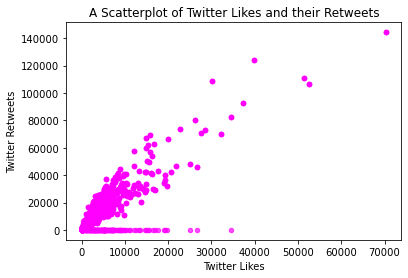

In [157]:
''' Plotting Relationship Between Favorites & Retweet Of WeRateDogs'''

twitter_archive_master.plot(kind='scatter',x='retweet_count', y='favorite_count', alpha=0.7, color='magenta')
plt.xlabel('Twitter Likes')
plt.ylabel('Twitter Retweets')
plt.title('A Scatterplot of Twitter Likes and their Retweets')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


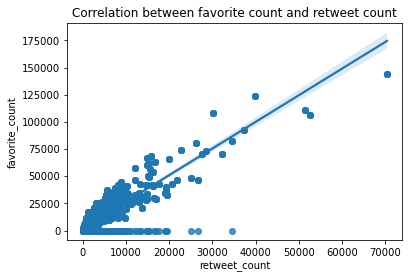

In [140]:
''' Plotting Correlation Between Favorites & Retweet Of WeRateDogs'''
sns.regplot(twitter_archive_master.retweet_count, twitter_archive_master.favorite_count);
plt.title('Correlation between favorite count and retweet count');

####  Plotting The Source

In [175]:
twitter_archive_master.source.describe()

count                   8388
unique                     4
top       Twitter for iPhone
freq                    7856
Name: source, dtype: object

In [180]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    7856
Vine                   364
Twitter Web Client     124
TweetDeck               44
Name: source, dtype: int64

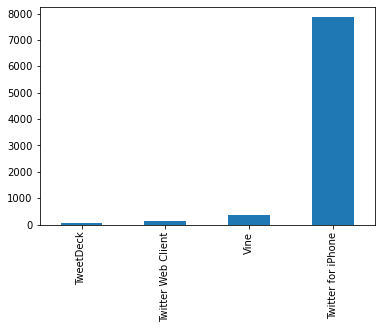

In [138]:
''' Plotting The Most Used Means Of Tweeting At The WeRateDogs Handle'''
twitter_archive_master.source.value_counts().sort_values().plot(kind = 'bar');

#### Plotting The Dog Names

In [181]:
twitter_archive_master.name.describe()

count        5560
unique        929
top       Charlie
freq           44
Name: name, dtype: object

In [182]:
twitter_archive_master.name.value_counts()

Charlie       44
Lucy          44
Oliver        40
Cooper        40
Penny         36
              ..
Shelby         4
Sephie         4
Bonaparte      4
Wishes         4
Christoper     4
Name: name, Length: 929, dtype: int64

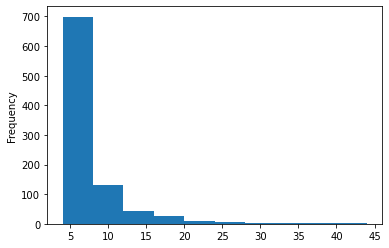

In [162]:
''' Plotting A Histogram To See The Most Common Dog Names'''
twitter_archive_master.name.value_counts().sort_values().plot(kind = 'hist');

The histogram is not clearly showing the details that explains which dog name is more common. 

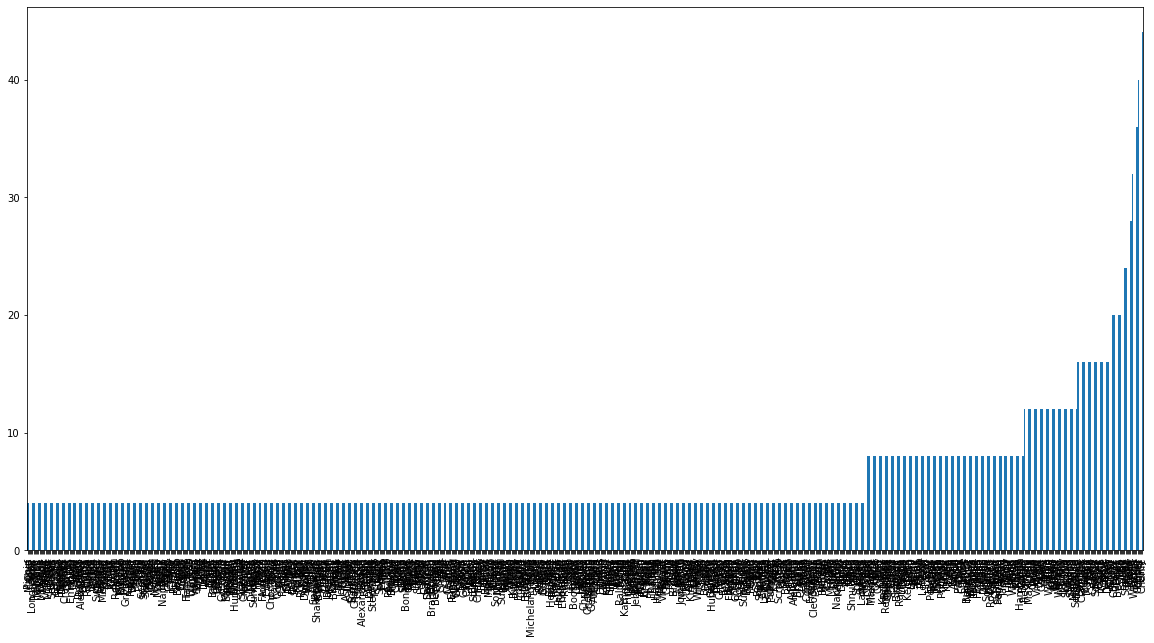

In [189]:
''' Plotting A Bar Chart To See The Most Common Dog Names'''
plt.figure(figsize=(20,10))
twitter_archive_master.name.value_counts().sort_values().plot(kind = 'bar');

The bar chart gives a better hint on which dog names are possible but the column has 939 unique entries at the level of cleaning used for this analysis (remember we didn't thoroughly inspect and clean the 'text' column since we know some names are hidden there). Further cleaning could hae seen the dog names increase in count and for this reason, it is difficult to clearly see the labels while displaying every name in the plot

Specify Order When Using sort_values() Pandas:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

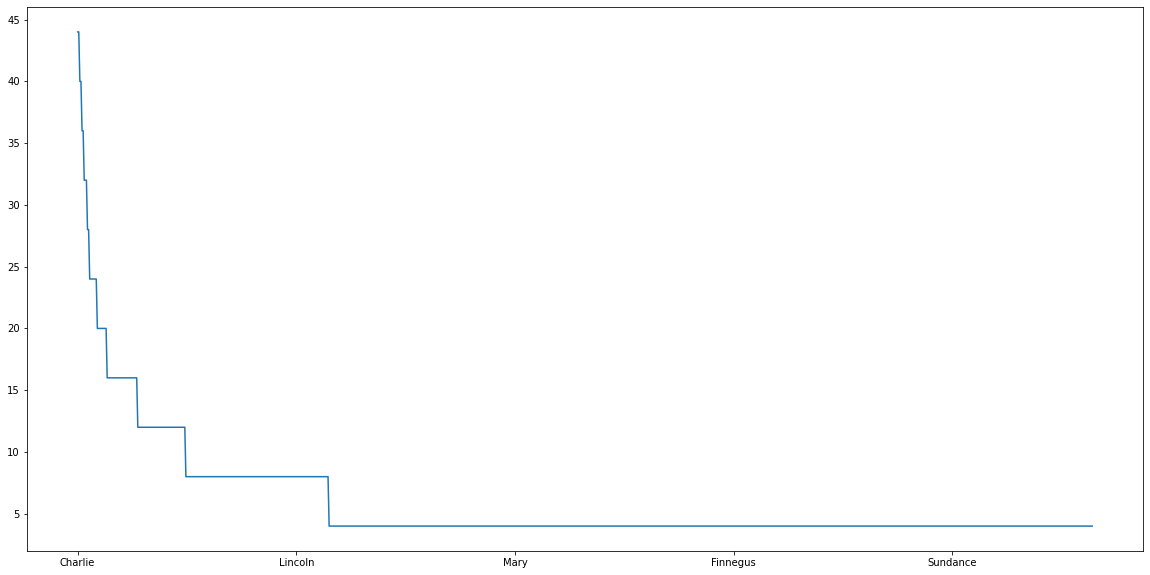

In [169]:
''' Plotting A Line Plot To See The Most Common Dog Names'''
plt.figure(figsize=(20,10), linewidth=30)
twitter_archive_master.name.value_counts().sort_values(ascending=False).plot(kind = 'line');

Using a line plot is better off because at least we can see the leading dog name. If combined with the value_counts() information earlier examined, we can also see what dog names finish as runners-up.

#### Plotting Dog Stages

In [183]:
twitter_archive_master.dog_stage.describe()

count        347
unique         4
top       pupper
freq         230
Name: dog_stage, dtype: object

In [184]:
twitter_archive_master.dog_stage.value_counts()

pupper     230
doggo       83
puppo       24
floofer     10
Name: dog_stage, dtype: int64

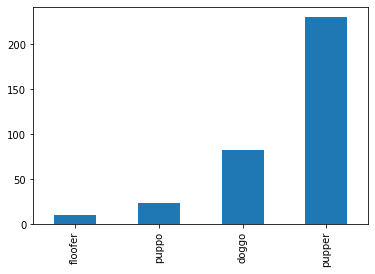

In [143]:
''' Plotting To See The More Common Dog Stages'''
twitter_archive_master.dog_stage.value_counts().sort_values().plot(kind = 'bar');

#### Plotting Changes Over Time

Time Series Plot or Line plot with Pandas:
https://www.geeksforgeeks.org/time-series-plot-or-line-plot-with-pandas/

<Figure size 1440x720 with 0 Axes>

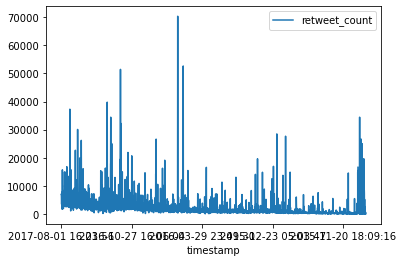

In [155]:
''' Plotting The Retweet Count Over Time'''
plt.figure(figsize=(20,10))
twitter_archive_master.plot.line('timestamp', 'retweet_count');

<Figure size 1440x720 with 0 Axes>

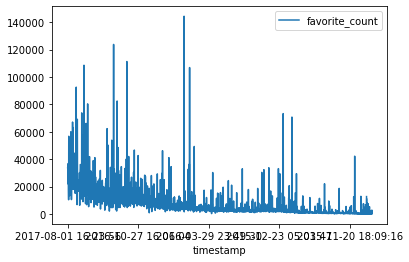

In [156]:
''' Plotting The Favorite Count Over Time'''
plt.figure(figsize=(20,10))
twitter_archive_master.plot('timestamp', 'favorite_count');

### Insights


1. pupper is the commonest dog stage

2. iPhone is the most used device by twitter users who engaged weratedogs account

3. Charlie and Lucy are quite popular dog names